In [1]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/_images/messi_face.jpg
# https://docs.opencv.org/3.4/dd/dd7/tutorial_morph_lines_detection.html
# https://github.com/afikanyati/cadenCV
# https://tuggeluk.github.io/deepscores/

# https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.shawacademy.com%2Fblog%2Ftips-and-tricks-to-master-music-notations%2F&psig=AOvVaw0b3uXo2ARmMZ9BZY5JZat_&ust=1615976104821000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCJCTy83KtO8CFQAAAAAdAAAAABAP

In [6]:
from util import extract;
from match import quater_notes_match,half_notes_match,whole_notes_match,clef_match

import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from copy import deepcopy
from PIL import Image
from midiutil.MidiFile import MIDIFile
import matplotlib.patches as patches


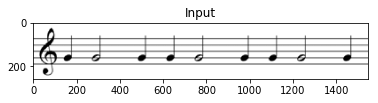

In [11]:
img_file = "./test/test1.png"
img = cv2.imread(img_file, 0)
# this is the origianl image 
plt.subplot(1, 1, 1)
plt.imshow(img, cmap="gray")
plt.title("Input")
plt.show()

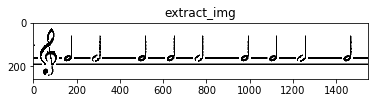

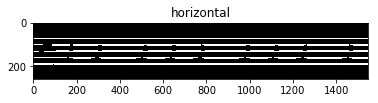

In [12]:
# extract the image and remove the vertical line 

extract_img, horizontal = extract(img)

plt.subplot(1, 1, 1)
plt.imshow(extract_img, cmap="gray")
plt.title("extract_img")
plt.show()

plt.subplot(1, 1, 1)
plt.imshow(horizontal, cmap="gray")
plt.title("horizontal")
plt.show()

Nums of quater_points:  20
Nums of half_points:  0
Nums of whole_points:  0
Nums of clef_points:  1


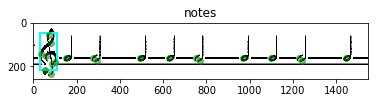

In [13]:
# match the notes and find the clef

# second paramter is threshold 
quater_points = quater_notes_match(img, 0.7)
half_points = half_notes_match(img,0.65)
whole_points = whole_notes_match(img,0.6)
clef_points = clef_match(img)

def dist2(x1, x2):
    return (x1-x2)**2

def fuse(points, d):
    ret = points.copy()
    d2 = d * d
    n = len(points)
    for i in range(n):
        for j in range(i + 1, n):
            if ( dist2( points[i][0], points[j][0]) < d2 and  dist2( points[i][2], points[j][2]) < d2 and
               dist2( points[i][1], points[j][1]) < d2 and dist2( points[i][3], points[j][3]) < d2 ):
                ret.remove(points[i])
                break
    return ret


quater_points = fuse(quater_points, 10)
half_points = fuse(half_points, 10)
whole_points = fuse(whole_points, 10)
clef_points = fuse(clef_points, 10)

print("Nums of quater_points: ", len(quater_points))
print("Nums of half_points: ", len(half_points))
print("Nums of whole_points: ", len(whole_points))
print("Nums of clef_points: ", len(clef_points))

plt.subplot(1, 1, 1)
plt.imshow(extract_img, cmap="gray")
for p in (quater_points):
    plt.plot( (p[0] + p[2])/2,(p[1] + p[3])/2, "go", alpha=0.5)

for p in (half_points):
    plt.plot( (p[0] + p[2])/2,(p[1] + p[3])/2, "ro", alpha=0.5)

for p in (whole_points):
    plt.plot( (p[0] + p[2])/2,(p[1] + p[3])/2, "bo", alpha=0.5)
ax = plt.gca()


for p in (clef_points):
    rect = patches.Rectangle((p[0],p[1]),
                 p[2] - p[0],
                 p[3]- p[1],
                 linewidth=2,
                 edgecolor='cyan',
                 fill = False)
    ax.add_patch(rect)
        
plt.title("notes")

plt.show()

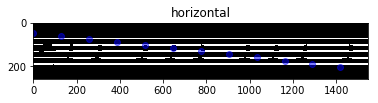

/Users/ejahn1/anaconda3/envs/msmd/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


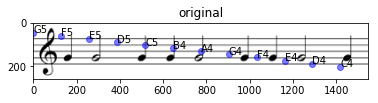

In [14]:
clef_y_top  = clef_points[0][3]
clef_y_bot  = clef_points[0][1]
height = clef_y_top - clef_y_bot

img_width = horizontal.shape[1]
total_pitches = ['G5', 'F5', 'E5', 'D5', 'C5', 'B4', 'A4', 'G4', 'F4', 'E4', 'D4', 'C4'] 
clef_gap = height/(1.0*len(total_pitches))

plt.subplot(1, 1, 1)
plt.imshow(horizontal, cmap="gray")

# total 12 points 
# G5 F5 E5 D5 C5 B4 A4 G4 F4 E4 D4 C4
for i in range(len(total_pitches)):
    plt.plot( (img_width/(1.0*len(total_pitches))) * i , clef_y_bot + i * clef_gap, "bo", alpha=0.5)
    
plt.title("horizontal")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)

plt.subplot(1, 1, 1)
plt.imshow(img, cmap="gray")

# total 12 points 
for i in range(len(total_pitches)):
    x, y = (img_width/(1.0*len(total_pitches))) * i , clef_y_bot + i * clef_gap
    plt.plot( x, y, "bo", alpha=0.5)

    ax.text(x, y, total_pitches[i], fontsize=10)

plt.title("original")
plt.show()


In [15]:
all_notes = []

for i in quater_points:
    if (i[0] <  clef_points[0][2] + 10):
        pass
    else:
        all_notes.append( [i[0], ((i[0] + i[2])/2.0,(i[1] + i[3])/2.0), 'quater', None ])
for i in half_points:
    if (i[0] <  clef_points[0][2] + 10):
        pass
    else:
        all_notes.append( [i[0], ((i[0] + i[2])/2.0,(i[1] + i[3])/2.0), 'half', None ])
for i in whole_points:
    if (i[0] <  clef_points[0][2] + 10):
        pass
    else:
        all_notes.append( [i[0], ((i[0] + i[2])/2.0,(i[1] + i[3])/2.0), 'whole', None ])

all_notes.sort(key=lambda x: x[0])
# combined them together and sorted them by x 


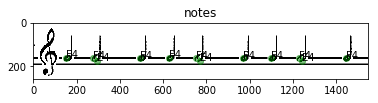

In [16]:

fig = plt.figure()
ax = fig.add_subplot(111)
plt.subplot(1, 1, 1)
plt.imshow(extract_img, cmap="gray")


for i in all_notes:
    x, y = i[1][0], i[1][1]
    

    plt.plot( x , y , "go", alpha=0.5)
    
    pitch_index = int ( ( (y - clef_y_bot) / clef_gap )) 
    ax.text(x, y, total_pitches[pitch_index], fontsize=10)
    i[3] = total_pitches[pitch_index]
    
        
plt.title("notes")

plt.show()


In [17]:
# for mapping 
note_to_duration = {'quater': 1/2, 'half': 1, 'whole':2}
pitch_to_MIDI = { "C8": 108, "B7": 107, "Bb7": 106, "A#7": 106, "A7": 105, "Ab7": 104, "G#7": 104, "G7": 103, "Gb7": 102, "F#7": 102, "F7": 101, "E7": 100, "Eb7": 99, "D#7": 99, "D7": 98, "Db7": 97, "C#7": 97, "C7": 96, "B6": 95, "Bb6": 94, "A#6": 94, "A6": 93, "Ab6": 92, "G#6": 92, "G6": 91, "Gb6": 90, "F#6": 90, "F6": 89, "E6": 88, "Eb6": 87, "D#6": 87, "D6": 86, "Db6": 85, "C#6": 85, "C6": 84, "B5": 83, "Bb5": 82, "A#5": 82, "A5": 81, "Ab5": 80, "G#5": 80, "G5": 79, "Gb5": 78, "F#5": 78, "F5": 77, "E5": 76, "Eb5": 75, "D#5": 75, "D5": 74, "Db5": 73, "C#5": 73, "C5": 72, "B4": 71, "Bb4": 70, "A#4": 70, "A4": 69, "Ab4": 68, "G#4": 68, "G4": 67, "Gb4": 66, "F#4": 66, "F4": 65, "E4": 64, "Eb4": 63, "D#4": 63, "D4": 62, "Db4": 61, "C#4": 61, "C4": 60, "B3": 59, "Bb3": 58, "A#3": 58, "A3": 57, "Ab3": 56, "G#3": 56, "G3": 55, "Gb3": 54, "F#3": 54, "F3": 53, "E3": 52, "Eb3": 51, "D#3": 51, "D3": 50, "Db3": 49, "C#3": 49, "C3": 48, "B2": 47, "Bb2": 46, "A#2": 46, "A2": 45, "Ab2": 44, "G#2": 44, "G2": 43, "Gb2": 42, "F#2": 42, "F2": 41, "E2": 40, "Eb2": 39, "D#2": 39, "D2": 38, "Db2": 37, "C#2": 37, "C2": 36, "B1": 35, "Bb1": 34, "A#1": 34, "A1": 33, "Ab1": 32, "G#1": 32, "G1": 31, "Gb1": 30, "F#1": 30, "F1": 29, "E1": 28, "Eb1": 27, "D#1": 27, "D1": 26, "Db1": 25, "C#1": 25, "C1": 24, "B0": 23, "Bb0": 22, "A#0": 22, "A0": 21 }

In [18]:
# convert it to digital music 

# create your MIDI object
mf = MIDIFile(1)     # only 1 track
track = 0   # the only track

time = 0    # start at the beginning
mf.addTrackName(track, time, "Sample Track")
mf.addTempo(track, time, 120)

# add some notes
channel = 0
volume = 100
for i in all_notes:
    pitch = pitch_to_MIDI[i[3]] # C4 (middle C)
    duration = note_to_duration[i[2]]         # 1 beat long
    mf.addNote(track, channel, pitch, time, duration, volume)
    time = time + duration

# write it to disk
with open("output.mid", 'wb') as outf:
    mf.writeFile(outf)